PROJET TER - CLASSIFICATION DE TEXTES TRADUITS - APPROCHE NAÏVE ET VECTORIELLE

In [2]:
import numpy as np
from sklearn import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import *
from sklearn.pipeline import *
from sklearn.preprocessing import *
import matplotlib.pyplot as plt
import time as time
import pandas as pd
from sklearn.svm import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import *
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from sklearn.feature_extraction.text import *

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import *
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import *
from scipy.stats import *
#from imblearn.over_sampling import RandomOverSampler, SMOTE
#from imblearn.under_sampling import RandomUnderSampler, NearMiss
import re

In [3]:
#Recuperation des donnéestextuelles à partir des dossiers contenant les livres sous format .txt
corpus=[]

path =r'./txtT'
liste_fichiers = []

for root, dirs, files in os.walk(path):
	for file in files:
		liste_fichiers.append(os.path.join(root,file).replace('\\','/'))

path =r'./txtO'
n_traduit=  len(liste_fichiers)

for root, dirs, files in os.walk(path):
	for file in files:
		liste_fichiers.append(os.path.join(root,file).replace('\\','/'))

print(" Il y a  " , len(liste_fichiers), " fichiers textes")

for fichier in liste_fichiers:
    #book = open_book(fichier)
    #lines = convert_epub_to_lines(book)
    #suppressionCode = re.compile(r'<.*?>')
    with open(fichier, 'r',encoding='utf-8') as nom_fich:
        texte_nettoye =  "".join(nom_fich.readlines()).replace("*","").replace("\n"," ").replace("—"," ").lower()
        corpus.append((fichier.split("/")[-1][:-4], texte_nettoye))
    if fichier == liste_fichiers[n_traduit]:
        n_traduit = len(corpus)-1


print(" le corpus fait " , len(corpus), " textes")

 le tiotuti fichier  1182  fichiers
 le corpus fait  1182  textes


In [4]:
#Extraction de caractéristique "naïve" du texte - maintenant mesure relative et non absolue

def delimitation_mot(texte):
    return re.split("[’ \-']", texte.replace('\n',' ').replace('.', ' '))

def delimitation_phrase(texte):
    return re.split("\.", texte.replace("\n", ' '))

# Transforme le texte en dictionnaire où chaque mot unique est associé à son nombre d'apparitions 
def text_to_freq(mots_texte):
    dico = {}
    dico["max"] = 1
    liste_mots = delimitation_mot(mots_texte)
    for mot in liste_mots:
        if mot in dico.keys():
            dico[mot]+=1
            if(dico[mot]>dico["max"]):
                dico["max"]=dico[mot]
        else:
            dico[mot]=1
    return (dico, len(liste_mots), liste_mots)

def nombre_mots(dicoTexte, taille):
    return len(dicoTexte.keys())/taille

def nombre_mots_rare(dicoTexte,taille):
    c=0
    for k in dicoTexte.keys():
        if dicoTexte[k]<5:
            c+=1
    return c/taille

def nombre_mots_frequent(dicoTexte,taille):
    c=0
    for k in dicoTexte.keys():
        if dicoTexte[k] >250:
            c+=1
    return c/taille

tt = text_to_freq(corpus[0][0])

l=[]
for texte in corpus:
    dico, taille, listeMots = text_to_freq(texte[1])
    l.append( (nombre_mots(dico, taille), nombre_mots_frequent(dico,taille), nombre_mots_rare(dico,taille), dico["max"]/taille) )

l

[(0.09082038126854786,
  0.0003571248931140285,
  0.0735375484130577,
  0.14550575926764248),
 (0.09634599744394098,
  0.00037759962820959687,
  0.07845358429185546,
  0.13803299639828048),
 (0.09036486424309968,
  0.0003783095696984259,
  0.07275302008619323,
  0.12896777722678637),
 (0.09844930092551604,
  0.00041542662952798003,
  0.0811171571197995,
  0.1630855983165006),
 (0.10044772986964531,
  0.0003964274887484551,
  0.08239861949956859,
  0.13078026257491313),
 (0.08700593698126187,
  0.000383835060591106,
  0.06944423674148958,
  0.14504977393610394),
 (0.10470201132472524,
  0.00043182357270145176,
  0.0863038943187831,
  0.10619210675165279),
 (0.09992469443318079,
  0.00045698249950118107,
  0.08196077674152169,
  0.11912439578546281),
 (0.10151064620612754,
  0.00045797270748154835,
  0.08392183932458981,
  0.12533850156639942),
 (0.09535471560788017,
  0.00047210173792452275,
  0.07535923991620194,
  0.07352984568174442),
 (0.08223692132324019,
  0.000381302529440569,
  

In [5]:
#Recuperation du contenu significatif

livreTrad = [livre[1] for livre in corpus[:n_traduit]]
livreOrig = [livre[1] for livre in corpus[n_traduit:]]

In [6]:

livreOriginal = " ".join(livreOrig)
corpusOrig = np.array([])
taille = len(livreOriginal)
pas = 500000
n=0
print(taille)
while(n<taille):
    corpusOrig = np.append(corpusOrig, livreOriginal[n:n+pas])
    n+=pas
print(corpusOrig.shape)

286084642
(573,)


In [7]:
livreTraduit = " ".join(livreTrad)
corpusTrad = np.array([])
taille = len(livreTraduit)
n=0
print(taille)
while(n<taille):
    corpusTrad = np.append(corpusTrad, livreTraduit[n:n+pas])
    n+=pas
print(corpusTrad.shape)

417052744
(835,)


In [8]:
features= np.concatenate((corpusTrad, corpusOrig), axis=0)
labels = [1]*corpusTrad.shape[0] + [0]*corpusOrig.shape[0]



In [9]:
#ultinb
#ecoupage
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.2)

modele = make_pipeline(CountVectorizer(), MultinomialNB())
grid = GridSearchCV(modele, {})

grid.fit(X_train, y_train)
ypred = grid.best_estimator_.predict(X_test)

print(grid.best_estimator_.score(X_test,y_test))
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
modele = grid.best_estimator_

0.9893617021276596
[[115   2]
 [  1 164]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       117
           1       0.99      0.99      0.99       165

    accuracy                           0.99       282
   macro avg       0.99      0.99      0.99       282
weighted avg       0.99      0.99      0.99       282



In [27]:
#GAUSSIANNB tfidf
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.35)

modele = make_pipeline(TfidfVectorizer(), MultinomialNB())
grid = GridSearchCV(modele, {})

grid.fit(X_train, y_train)
ypred = grid.best_estimator_.predict(X_test)

print(grid.best_estimator_.score(X_test,y_test))
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
modele

0.5801217038539553
[[  0 207]
 [  0 286]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       207
           1       0.58      1.00      0.73       286

    accuracy                           0.58       493
   macro avg       0.29      0.50      0.37       493
weighted avg       0.34      0.58      0.43       493



C:\Users\okada\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.40)

ngrams = [(i,i) for i in range(2,7)]
lPreds = []

for e in ngrams:
    modelee = make_pipeline(CountVectorizer(ngram_range=e, analyzer="char"), MultinomialNB())
    paramse = {"countvectorizer__analyzer":["word"], "countvectorizer__ngram_range":[(1,1),(2,2),(3,3)]}
    grid = GridSearchCV(modelee, {})

    grid.fit(X_train, y_train)
    ypred = grid.best_estimator_.predict(X_test)

    lPreds.append(grid.best_estimator_.score(X_test,y_test))
    print(grid.best_estimator_.score(X_test,y_test))
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))


x = np.arange(0,5)

plt.plot(x, lPreds)

0.9804964539007093
[[225   9]
 [  2 328]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       234
           1       0.97      0.99      0.98       330

    accuracy                           0.98       564
   macro avg       0.98      0.98      0.98       564
weighted avg       0.98      0.98      0.98       564

0.9680851063829787
[[216  18]
 [  0 330]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       234
           1       0.95      1.00      0.97       330

    accuracy                           0.97       564
   macro avg       0.97      0.96      0.97       564
weighted avg       0.97      0.97      0.97       564

0.9343971631205674
[[197  37]
 [  0 330]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       234
           1       0.90      1.00      0.95       330

    accuracy                           0.93       564
  

KeyboardInterrupt: 

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.40)

ngrams = [(i,i) for i in range(1,10)]
lPredsw = []

for e in ngrams:
    modele = make_pipeline(CountVectorizer(ngram_range=e, analyzer="char_wb"), MultinomialNB())
    params = {"countvectorizer__analyzer":["word"], "countvectorizer__ngram_range":[(1,1),(2,2),(3,3)]}
    grid = GridSearchCV(modele, {})

    grid.fit(X_train, y_train)
    ypred = grid.best_estimator_.predict(X_test)

    lPredsw.append(grid.best_estimator_.score(X_test,y_test))
    print(grid.best_estimator_.score(X_test,y_test))
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

0.8101791175185671
[[1956  362]
 [ 507 1753]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      2318
           1       0.83      0.78      0.80      2260

    accuracy                           0.81      4578
   macro avg       0.81      0.81      0.81      4578
weighted avg       0.81      0.81      0.81      4578

0.8936216688510267
[[2095  223]
 [ 264 1996]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2318
           1       0.90      0.88      0.89      2260

    accuracy                           0.89      4578
   macro avg       0.89      0.89      0.89      4578
weighted avg       0.89      0.89      0.89      4578

0.9469200524246396
[[2166  152]
 [  91 2169]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2318
           1       0.93      0.96      0.95      2260

    accuracy                           0.95 

Text(0, 0.5, 'Précision (en %)')

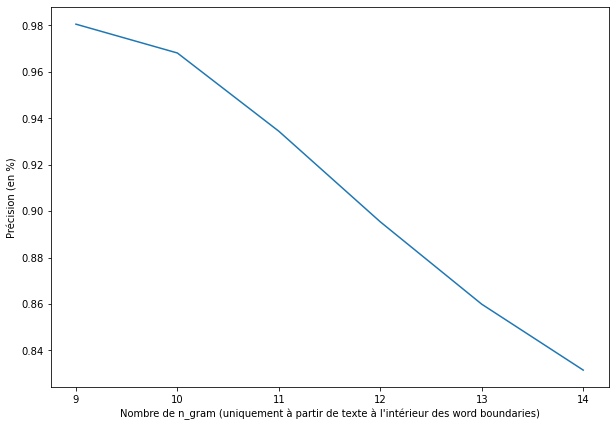

In [32]:

x1 = np.arange(9,15)
plt.figure(figsize=(10,7))
plt.plot(x1, lPreds)
plt.xlabel("Nombre de n_gram (uniquement à partir de texte à l'intérieur des word boundaries)")
plt.ylabel("Précision (en %)")


In [ ]:
for x in range(len(X_test)):
    if ypred[x]!=y_test[x]:
        for e in range(len(corpus)):
            if X_test[x] in corpus[e][1]:
                print(corpus[e][0])

In [17]:
#Recuperation des donnéestextuelles à partir des dossiers contenant les livres sous format .txt
corpus=[]

path =r'./ttestT'
liste_fichiers = []

for root, dirs, files in os.walk(path):
	for file in files:
		liste_fichiers.append(os.path.join(root,file).replace('\\','/'))

path =r'./ttestO'
n_traduit=  len(liste_fichiers)

for root, dirs, files in os.walk(path):
	for file in files:
		liste_fichiers.append(os.path.join(root,file).replace('\\','/'))

print(" le tiotuti fichier " , len(liste_fichiers), " fichiers")

for fichier in liste_fichiers:
    #book = open_book(fichier)
    #lines = convert_epub_to_lines(book)
    #suppressionCode = re.compile(r'<.*?>')
    with open(fichier, 'r',encoding='utf-8') as nom_fich:
        texte_nettoye =  "".join(nom_fich.readlines()).replace("*","").replace("\n"," ").replace("—"," ").lower()
        corpus.append((fichier.split("/")[-1][:-4], texte_nettoye))
    if fichier == liste_fichiers[n_traduit]:
        n_traduit = len(corpus)-1


print(" le corpus fait " , len(corpus), " textes")




 le tiotuti fichier  202  fichiers
 le corpus fait  202  textes


In [ ]:
import seaborn as sns
test = pd.DataFrame(l, columns=["words_count","freqwords","rarewords","maxoccurence"])
test["result"]=train_labels

sns.jointplot(data=test, x="words_count", y="freqwords", hue="result")

In [ ]:
sns.pairplot(data=test, hue="result")

In [93]:
def evaluation(model, X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X[1000:], Y[1000:], test_size=0.25)
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(model.score(X_test,y_test))
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X[:300], Y[:300],
                                              cv=5, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X=train_ds[:,1], y=train_labels)

evaluation(SVC(random_state=0),X_train_smote, y_train_smote)

In [ ]:
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(X=train_ds[:,1], y=train_labels)
evaluation(SVC(random_state=0),X_train_nearmiss, y_train_nearmiss)

In [ ]:
#cleaning datset try

clino_ds = np.delete(np.delete(train_ds,[540, 1047, 1728, 2100], 0), az.index, 0)
clino_labels = np.delete(np.delete(train_labels,[540, 1047, 1728, 2100], 0), az.index,0)


In [ ]:
#Optimisation des modèles pour les cinq canaux (chaque modèle est indépendant)
def model_prediction(X, Y):
    splitted_models = []
    listePrediction = []
    smote = SMOTE(random_state=0)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


    param_grid={"C": [0.9,1.0,1.1],'gamma':[0.001,0.0001],'kernel':['linear','sigmoid','poly','rbf']}

    grid = GridSearchCV(BaggingClassifier(SVC(C=50.0,probability=True)), param_grid={}, cv=5)

    for i in range(5):
        X_train_smote, y_train_smote= smote.fit_resample(X_train[:,i], Y_train)
        grid.fit(X_train_smote,y_train_smote)
        splitted_models.append(grid.best_estimator_)

        print(f"Performance sur le canal {i+1} : {splitted_models[i].score(X_test[:,i], Y_test)}")
        print("infos : ",grid.best_params_, grid.best_score_)
        ypred = splitted_models[i].predict(X_test[:,i])
        print(confusion_matrix(Y_test, ypred))
        print(classification_report(Y_test, ypred))


        listePrediction.append( splitted_models[i].predict_proba(X[:,i])[:,1] )
        print(listePrediction, len(listePrediction))


    listePrediction = (np.array(listePrediction)).T
    print(listePrediction, listePrediction.shape)

    return (listePrediction, splitted_models)

t1 = time.time()
predictions, modeles_canaux = model_prediction(train_ds, train_labels)
t2 = time.time()
print(f"Le programme a mis {t2-t1} s à s'éxecuter")

In [ ]:
#Optimisation des modèles pour les cinq canaux (chaque modèle est indépendant)
def model_prediction(X, Y):
    splitted_models = []
    listePrediction = []

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    nearmiss = NearMiss(version=3)


    param_grid={"C": [0.9,1.0,1.1],'gamma':[0.001,0.0001],'kernel':['linear','sigmoid','poly','rbf']}

    grid = GridSearchCV(BaggingClassifier(), param_grid={}, cv=5)

    for i in range(5):
        X_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(X[:,i], Y)

        grid.fit(X_train_nearmiss, y_train_nearmiss)
        splitted_models.append(grid.best_estimator_)

        print(f"Performance sur le canal {i+1} : {splitted_models[i].score(X_test[:,i], Y_test)}")
        print("infos : ",grid.best_params_, grid.best_score_)
        ypred = splitted_models[i].predict(X_test[:,i])
        print(confusion_matrix(Y_test, ypred))
        print(classification_report(Y_test, ypred))


        listePrediction.append( splitted_models[i].predict_proba(X[:,i])[:,1] )
        print(listePrediction, len(listePrediction))


    listePrediction = np.array(listePrediction).T
    print(listePrediction, listePrediction.shape)

    return (listePrediction, splitted_models)

t1 = time.time()
predictions2, modeles_canaux2 = model_prediction(train_ds, train_labels)
t2 = time.time()
print(f"Le programme a mis {t2-t1} s à s'éxecuter")

In [ ]:
#Modèle d'assemblage des données
def merge_channels(X, Y, modele, params):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote= smote.fit_resample(X, Y)


    grid = GridSearchCV(modele, param_grid=params, cv=5)
    grid.fit(X_train_smote,y_train_smote)
    modele = (grid.best_estimator_)
    print("infos : ",grid.best_params_, grid.best_score_)
    print(f"Performance sur l'assembleur : {modele.score(X_test, Y_test)}")
    print(Y)

    return modele

param_svc={'C':[0.1,0.25, 0.5], 'gamma':[0.01,0.1,0.001,0.0001], 'kernel':['rbf','linear'] }
param_knn={'n_neighbors':np.arange(5,50,5)}
listeModeles = [(SVC(),param_svc),
                (BaggingClassifier(SVC(),max_samples=0.5, max_features=0.5), {}),
                ( KNeighborsClassifier(),param_knn),
                (SVC(),{})
                ]
m =[]
s=[]
for model in listeModeles:
    m.append(merge_channels(predictions, train_labels, model[0],model[1]))
#    s.append(merge_channels(predictions2, train_labels, model[0],model[1]))

modele_assembleur = m[0]


In [ ]:
#Reconstruction de la sortie des cinq modèles en un np.array qu'utilisera le modèle d'assemblage
def predict_splitted_score(X, models):
    listePrediction = []

    for i in range(5):
        
        listePrediction.append(models[i].predict_proba(X[:,i])[:,1])

    listePrediction = np.array(listePrediction).T
    return listePrediction

In [ ]:
def construction_sociale(listePred):
  apolito = []
  for x in listePred:
    if np.sum(x) >= 2.15:
      apolito.append(1)
    else:
      apolito.append(0)

  return apolito


def assemblage_modele(l1, l2):
  sortie=[]
  for i in range(len(l1)):
    if l1[i]==1 or l2[i]==1:
      sortie.append(1)
    else:
      sortie.append(0)
  return sortie

In [ ]:

t1 = time.time()
#total_test = np.concatenate((donnees_test,extract_features(donnees_test)), axis=2)
feature_extract = predict_splitted_score(donnees_test, modeles_canaux)
X_train, X_test, Y_train, Y_test = train_test_split(train_ds, train_labels, test_size=0.01)

print(classification_report(Y_test, construction_sociale(predict_splitted_score(X_test, modeles_canaux))))
print(feature_extract[4])

abou = assemblage_modele(m[1].predict(feature_extract).astype(int) , assemblage_modele(assemblage_modele(m[1].predict(feature_extract).astype(int), m[0].predict(feature_extract).astype(int)),  m[3].predict(feature_extract).astype(int)))
sortie = pd.Series(m[1].predict(feature_extract).astype(int))
print(sortie)
sortie.to_csv("rendu.csv",header=["Id,Outcome"])
t2=time.time()
print(f"Le programme a mis {t2-t1} s à s'éxecuter")

with open('rendu.csv', 'r') as file:
    # read a list of lines into data
    data = file.readlines()

# now change the 2nd line, note that you have to add a newline
data[0] = 'Id,Outcome\n'

# and write everything back
with open('rendu.csv', 'w') as file:
    file.writelines( data )